# Parsch

Argyridou, Eliza, and John Parsch. 2018. “Regulation of the X Chromosome in the Germline and Soma of Drosophila Melanogaster Males.” Genes 9 (5). https://doi.org/10.3390/genes9050242.

I just want to re-create some tables that they had in this paper.

In [2]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb

In [3]:
# Setup notebook
nbconfig = Nb.setup_notebook()

last updated: 2018-07-26 
Git hash: ec590ad53c8c96d2ae0d3ae6d39670b1f8b4c189


In [4]:
tpm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet')

In [5]:
tpm.head()

,Spermatogonia (6),Early 1º Spermatocytes (3),Mid 1º Spermatocytes (2),Late 1º Spermatocytes (0),Early Cyst Cells (5),Mid Cyst Cells (1),Late Cyst Cells (4),Terminal Epithelium (7),Pigment Cells (8),Unknown (9),Unknown (10),Unknown (11)
FBgn,,,,,,,,,,,,
FBgn0031081,0.010683,0.037465,0.014283,0.029087,0.043257,0.091192,0.277489,0.010126,0.000000,0.201009,0.215096,0.014723
FBgn0031085,8.815359,103.950593,161.995266,126.377679,7.896765,24.486588,15.780334,9.539043,12.360298,12.922087,33.704978,172.213665
FBgn0040784,123.414523,197.599416,101.287170,131.831245,11.677487,28.473722,16.163539,11.461293,12.861103,14.383234,28.333855,97.273946
FBgn0031086,0.136165,0.100537,0.016551,0.000000,0.044555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008530
FBgn0031082,2.387809,19.917495,29.496266,23.780482,2.090575,5.766149,3.691380,2.610043,2.718978,2.765984,8.879484,34.065102


In [26]:
chroms = nbconfig.fbgn2chrom.copy()
chroms.replace({'chr2L': 'A', 'chr2R': 'A', 'chr3L': 'A', 'chr3R': 'A'}, inplace=True)
chroms = chroms.query('chrom != "chr4" & chrom != "chrM" & chrom != "chrY"').copy()
xgenes = chroms.query('chrom == "chrX"').index.tolist()
agenes = chroms.query('chrom == "A"').index.tolist()

In [43]:
tpmChrom = tpm.join(chroms, how='left')
tpmOn = (tpm > 0).join(chroms, how='left')

In [44]:
numGenesOn = tpmOn.groupby('chrom').sum().T
numGenesOn.columns = ['# A genes', '# X genes']
numGenesOn

,# A genes,# X genes
Spermatogonia (6),10703.0,2024.0
Early 1º Spermatocytes (3),11841.0,2122.0
Mid 1º Spermatocytes (2),11416.0,2038.0
Late 1º Spermatocytes (0),10464.0,1911.0
Early Cyst Cells (5),10168.0,1974.0
Mid Cyst Cells (1),10197.0,1920.0
Late Cyst Cells (4),10187.0,1934.0
Terminal Epithelium (7),9488.0,1843.0
Pigment Cells (8),9671.0,1865.0
Unknown (9),9338.0,1840.0


In [48]:
medGenes = tpmChrom.groupby('chrom').median().T
medGenes.columns = ['A median', 'X median']
medGenes['X/A'] = medGenes['X median'] / medGenes['A median']
medGenes

,A median,X median,X/A
Spermatogonia (6),1.167523,1.467198,1.256676
Early 1º Spermatocytes (3),2.605759,2.089399,0.801839
Mid 1º Spermatocytes (2),1.924054,1.168702,0.607416
Late 1º Spermatocytes (0),2.319596,1.617531,0.697333
Early Cyst Cells (5),0.958213,1.241425,1.295563
Mid Cyst Cells (1),1.362356,1.472303,1.080704
Late Cyst Cells (4),1.335175,1.482960,1.110685
Terminal Epithelium (7),1.112556,1.493441,1.342351
Pigment Cells (8),1.194712,1.433112,1.199546
Unknown (9),0.998045,1.212480,1.214855


In [54]:
from scipy.stats import mannwhitneyu

In [65]:
tpm.head()

,Spermatogonia (6),Early 1º Spermatocytes (3),Mid 1º Spermatocytes (2),Late 1º Spermatocytes (0),Early Cyst Cells (5),Mid Cyst Cells (1),Late Cyst Cells (4),Terminal Epithelium (7),Pigment Cells (8),Unknown (9),Unknown (10),Unknown (11)
FBgn,,,,,,,,,,,,
FBgn0031081,0.010683,0.037465,0.014283,0.029087,0.043257,0.091192,0.277489,0.010126,0.000000,0.201009,0.215096,0.014723
FBgn0031085,8.815359,103.950593,161.995266,126.377679,7.896765,24.486588,15.780334,9.539043,12.360298,12.922087,33.704978,172.213665
FBgn0040784,123.414523,197.599416,101.287170,131.831245,11.677487,28.473722,16.163539,11.461293,12.861103,14.383234,28.333855,97.273946
FBgn0031086,0.136165,0.100537,0.016551,0.000000,0.044555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008530
FBgn0031082,2.387809,19.917495,29.496266,23.780482,2.090575,5.766149,3.691380,2.610043,2.718978,2.765984,8.879484,34.065102


In [108]:
def mann(dat):
    _x = dat.reindex(xgenes).dropna()
    _a = dat.reindex(agenes).dropna()
    _, pval = mannwhitneyu(_x, _a, alternative='less')
    return pd.Series([np.round(pval, 4)], name=dat.name, index=['p-value'])

p_value = tpm.apply(mann).T

In [109]:
parsch1 = numGenesOn.join(medGenes).join(p_value)
parsch1 = parsch1.loc[nbconfig.CLUSTER_ORDER, ['# X genes', 'X median', '# A genes', 'A median', 'X/A', 'p-value']]
display(parsch1)
display(Markdown('p-value: One-sided Mann-Whiteney U'))

,# X genes,X median,# A genes,A median,X/A,p-value
Spermatogonia (6),2024.0,1.467198,10703.0,1.167523,1.256676,0.9990
Early 1º Spermatocytes (3),2122.0,2.089399,11841.0,2.605759,0.801839,0.0008
Mid 1º Spermatocytes (2),2038.0,1.168702,11416.0,1.924054,0.607416,0.0000
Late 1º Spermatocytes (0),1911.0,1.617531,10464.0,2.319596,0.697333,0.0001
Early Cyst Cells (5),1974.0,1.241425,10168.0,0.958213,1.295563,1.0000
Mid Cyst Cells (1),1920.0,1.472303,10197.0,1.362356,1.080704,0.7981
Late Cyst Cells (4),1934.0,1.482960,10187.0,1.335175,1.110685,0.9751
Terminal Epithelium (7),1843.0,1.493441,9488.0,1.112556,1.342351,1.0000
Pigment Cells (8),1865.0,1.433112,9671.0,1.194712,1.199546,0.9994
Unknown (9),1840.0,1.212480,9338.0,0.998045,1.214855,0.9989


p-value: One-sided Mann-Whiteney U

In [300]:
def prop_in_bin(dat):
    ct = pd.cut(dat, [2, 4, 8, 16, 32, 64, 128, 256, 99999999999], duplicates='drop')
    ct.name = f'bins'

    cnts = chroms.join(ct, how='right').groupby([f'bins', 'chrom']).size()
    cnts.name = 'cnts'
    cnts = cnts.to_frame().reset_index()

    _x = cnts.query('chrom == "chrX"').copy()
    expectation = _x.cnts.sum() / _x.shape[0]
    _x[f'{dat.name}'] = _x['cnts'] / expectation
    return _x[['bins', f'{dat.name}']].set_index('bins', drop=True)

In [301]:
dfs = []
for i, col in tpm.iteritems():
    dfs.append(prop_in_bin(col))

In [302]:
binned = pd.concat(dfs, axis=1).reset_index().melt(id_vars='bins')

In [305]:
def myplot(data, name, ax):
    sns.barplot('bins', 'value', data=data, ax=ax)
    ax.axhline(1, color='k', ls=':')
    ax.text(0.5, .99, name, ha='center', va='top', fontdict={'size': 10}, transform=ax.transAxes)
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

In [306]:
from itertools import zip_longest

Text(0.5,0.01,'Bins')

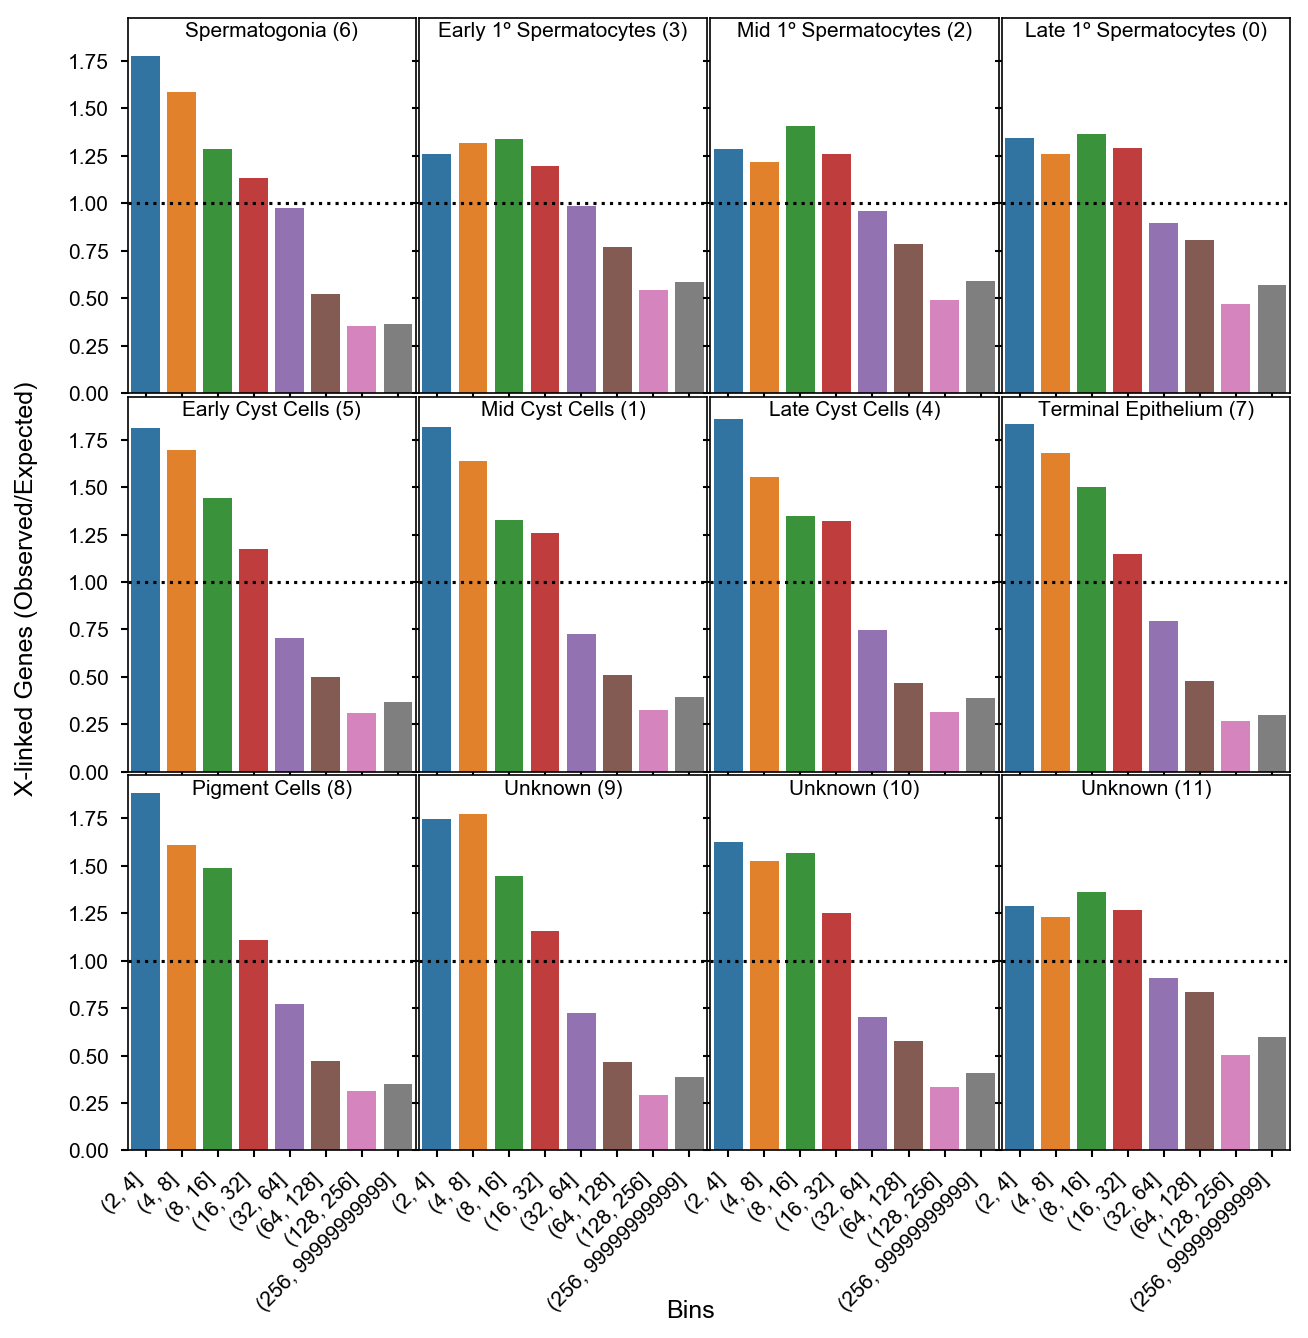

In [307]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 10), gridspec_kw={'wspace': 0.01, 'hspace': 0.01})
for ax, name in zip_longest(axes.flatten(), nbconfig.CLUSTER_ORDER):
    if name is None:
        ax.set_visible(False)
        continue
    dd = binned.query(f'variable == "{name}"')
    myplot(dd, name, ax)
    
fig.text(0.05, 0.5, 'X-linked Genes (Observed/Expected)', rotation=90, transform=fig.transFigure, fontsize=12, ha='left', va='center')
fig.text(0.5, 0.01, 'Bins', transform=fig.transFigure, fontsize=12, ha='center', va='bottom')